<img src="housing.jfif" width="500" height="340"> 

<p><justify> In this project we are going to predict house price using the Ames Housing dataset compiled by Dean De Cock. The dataset has a whooping number of explanatory variables describing every aspect of residential houses in Ames, Iowa. The aim of the competition is to predict the final price of each home. The dataset is a good playground to test simple and advanced regression techniques. Given the number of features we are only going to perform a reduced exploratory analysis answering some basic questions. We tested several regression models like Linear Regression, LASSO and Ridge regression, Elastic Net regression, Random Forests and Gradient Boosting regression.</justify><p>

# Importing libraries and the dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import boxcox1p

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn import set_config

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import VotingRegressor,StackingRegressor

import optuna
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

Let's import the train and test datasets, and see what kind of features do we have in it.

In [2]:
df_train = pd.read_csv("train.csv",index_col='Id')
df_test = pd.read_csv("test.csv",index_col='Id')

In [3]:
df_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [4]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Whoa! We have a huge number of features, let's see if we have missing values or duplicates.

In [6]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Checking Integrity

<Axes: >

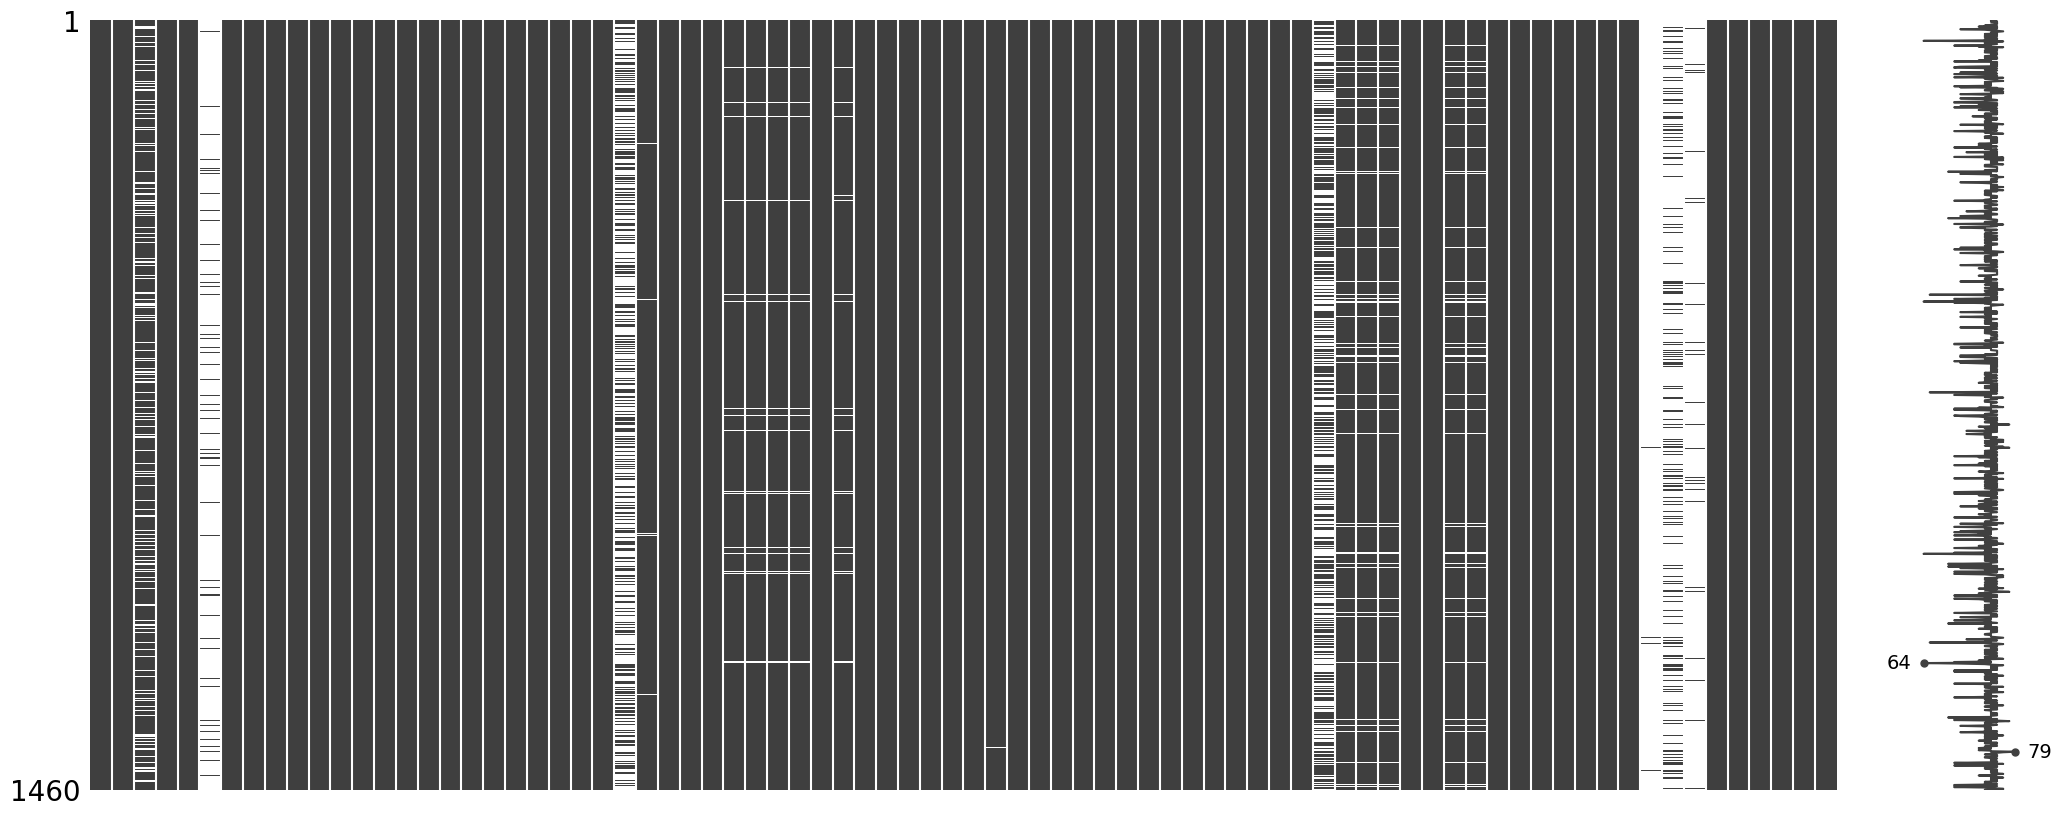

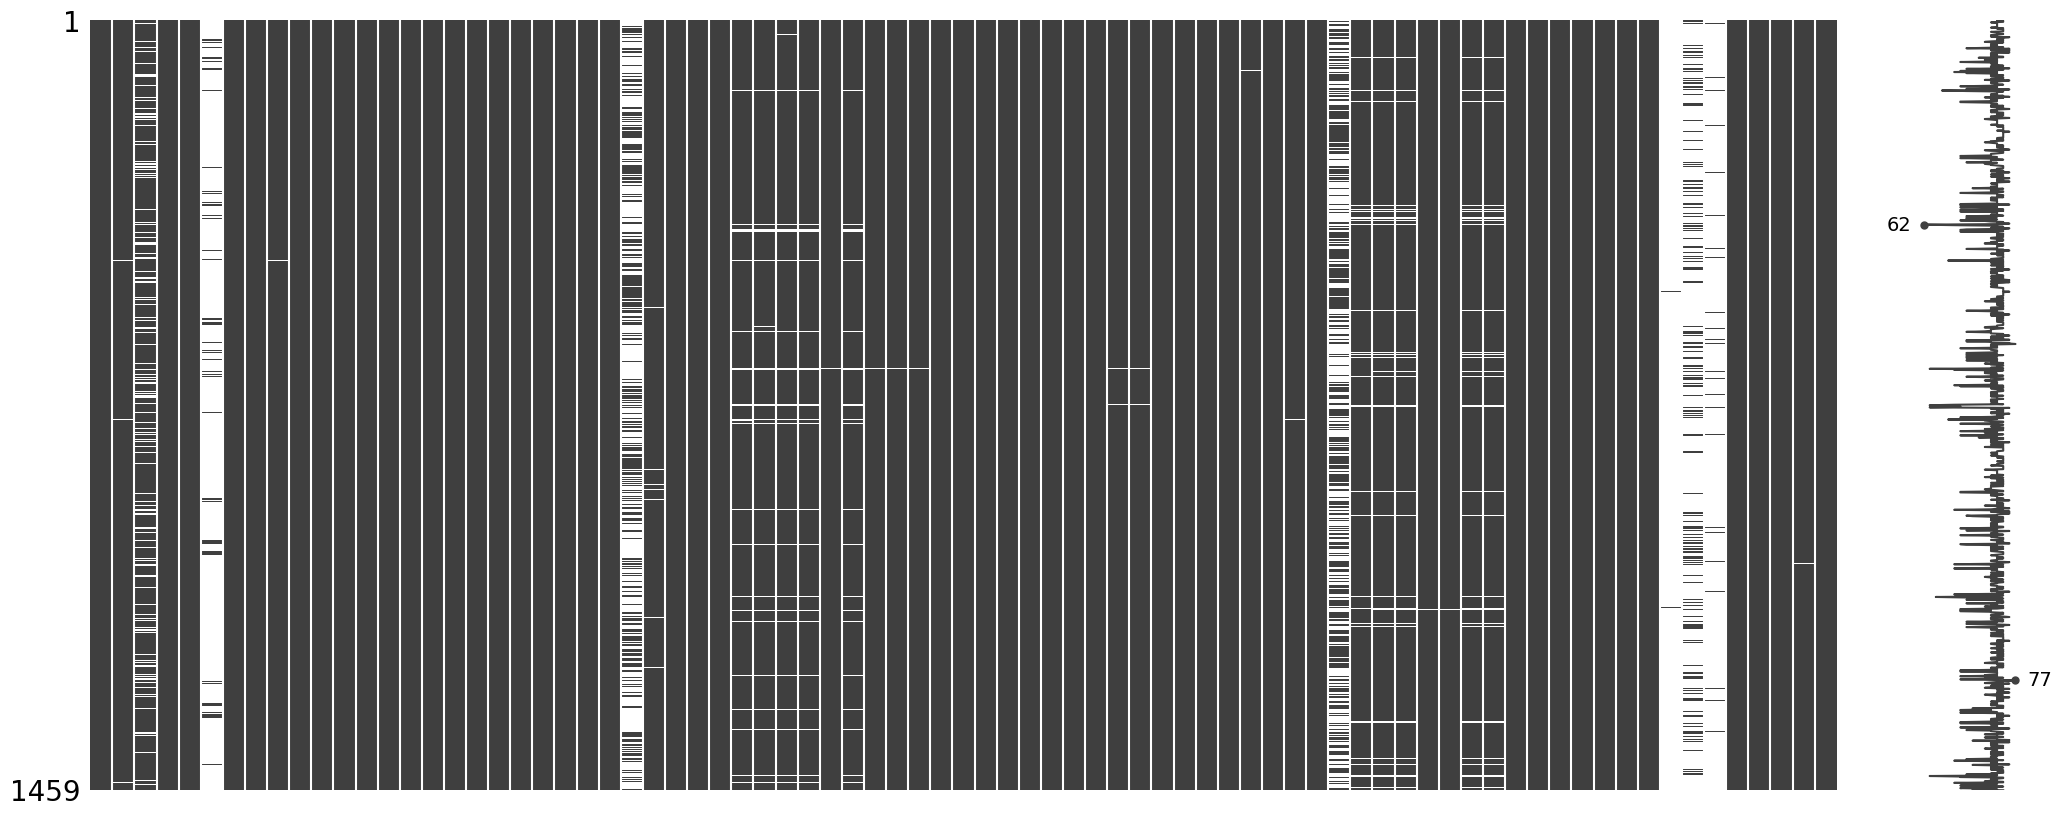

In [7]:
# check pattern of missingness
msno.matrix(df_train)
msno.matrix(df_test)

In [8]:
duplicates_train = df_train[df_train.duplicated()]
duplicates_test = df_test[df_test.duplicated()]
                             
print(f'Number of duplicates in training data:',len(duplicates_train))
print(f'Number of duplicates in test data:',len(duplicates_test))

Number of duplicates in training data: 0
Number of duplicates in test data: 0


We have no duplicates but we have a lot of missing values to take care of later on.

# Exploratory Data Analysis

Let's first divide our features into categorical and numerical, so we can study them separatedly. 

In [9]:
num_cols = df_train.drop('SalePrice',axis=1).select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()

Let's see what the distribution of sale price looks like.

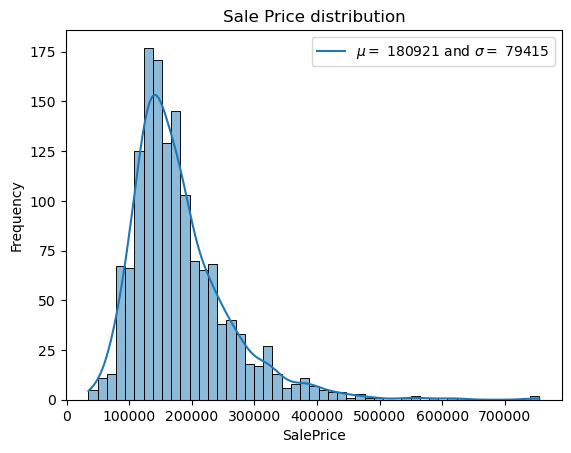

In [10]:
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_train['SalePrice'])
sns.histplot(data=df_train,x='SalePrice',kde=True)
#Now plot the distribution
plt.legend(['$\mu=$ {:.0f} and $\sigma=$ {:.0f}'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sale Price distribution')
plt.show()

By looking at the distribution we can see it's a little bit right-skewed, let's make a QQ plot to verify this.

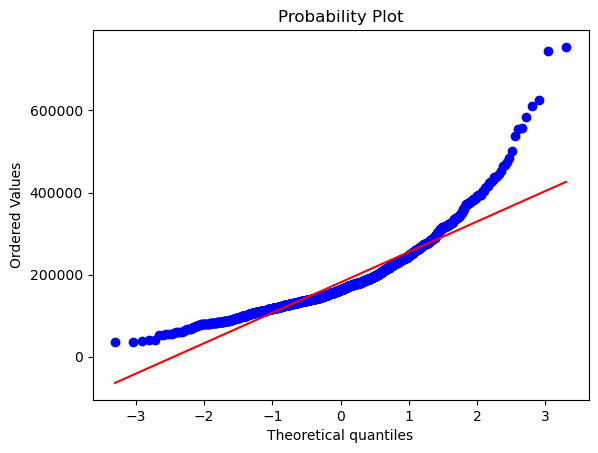

In [11]:
stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

The QQ plot clearly shows that the quantile points do not lie on the theoretical normal line.

Now it's time to see the distribution of the numerical features.

In [12]:
len(num_cols)

36

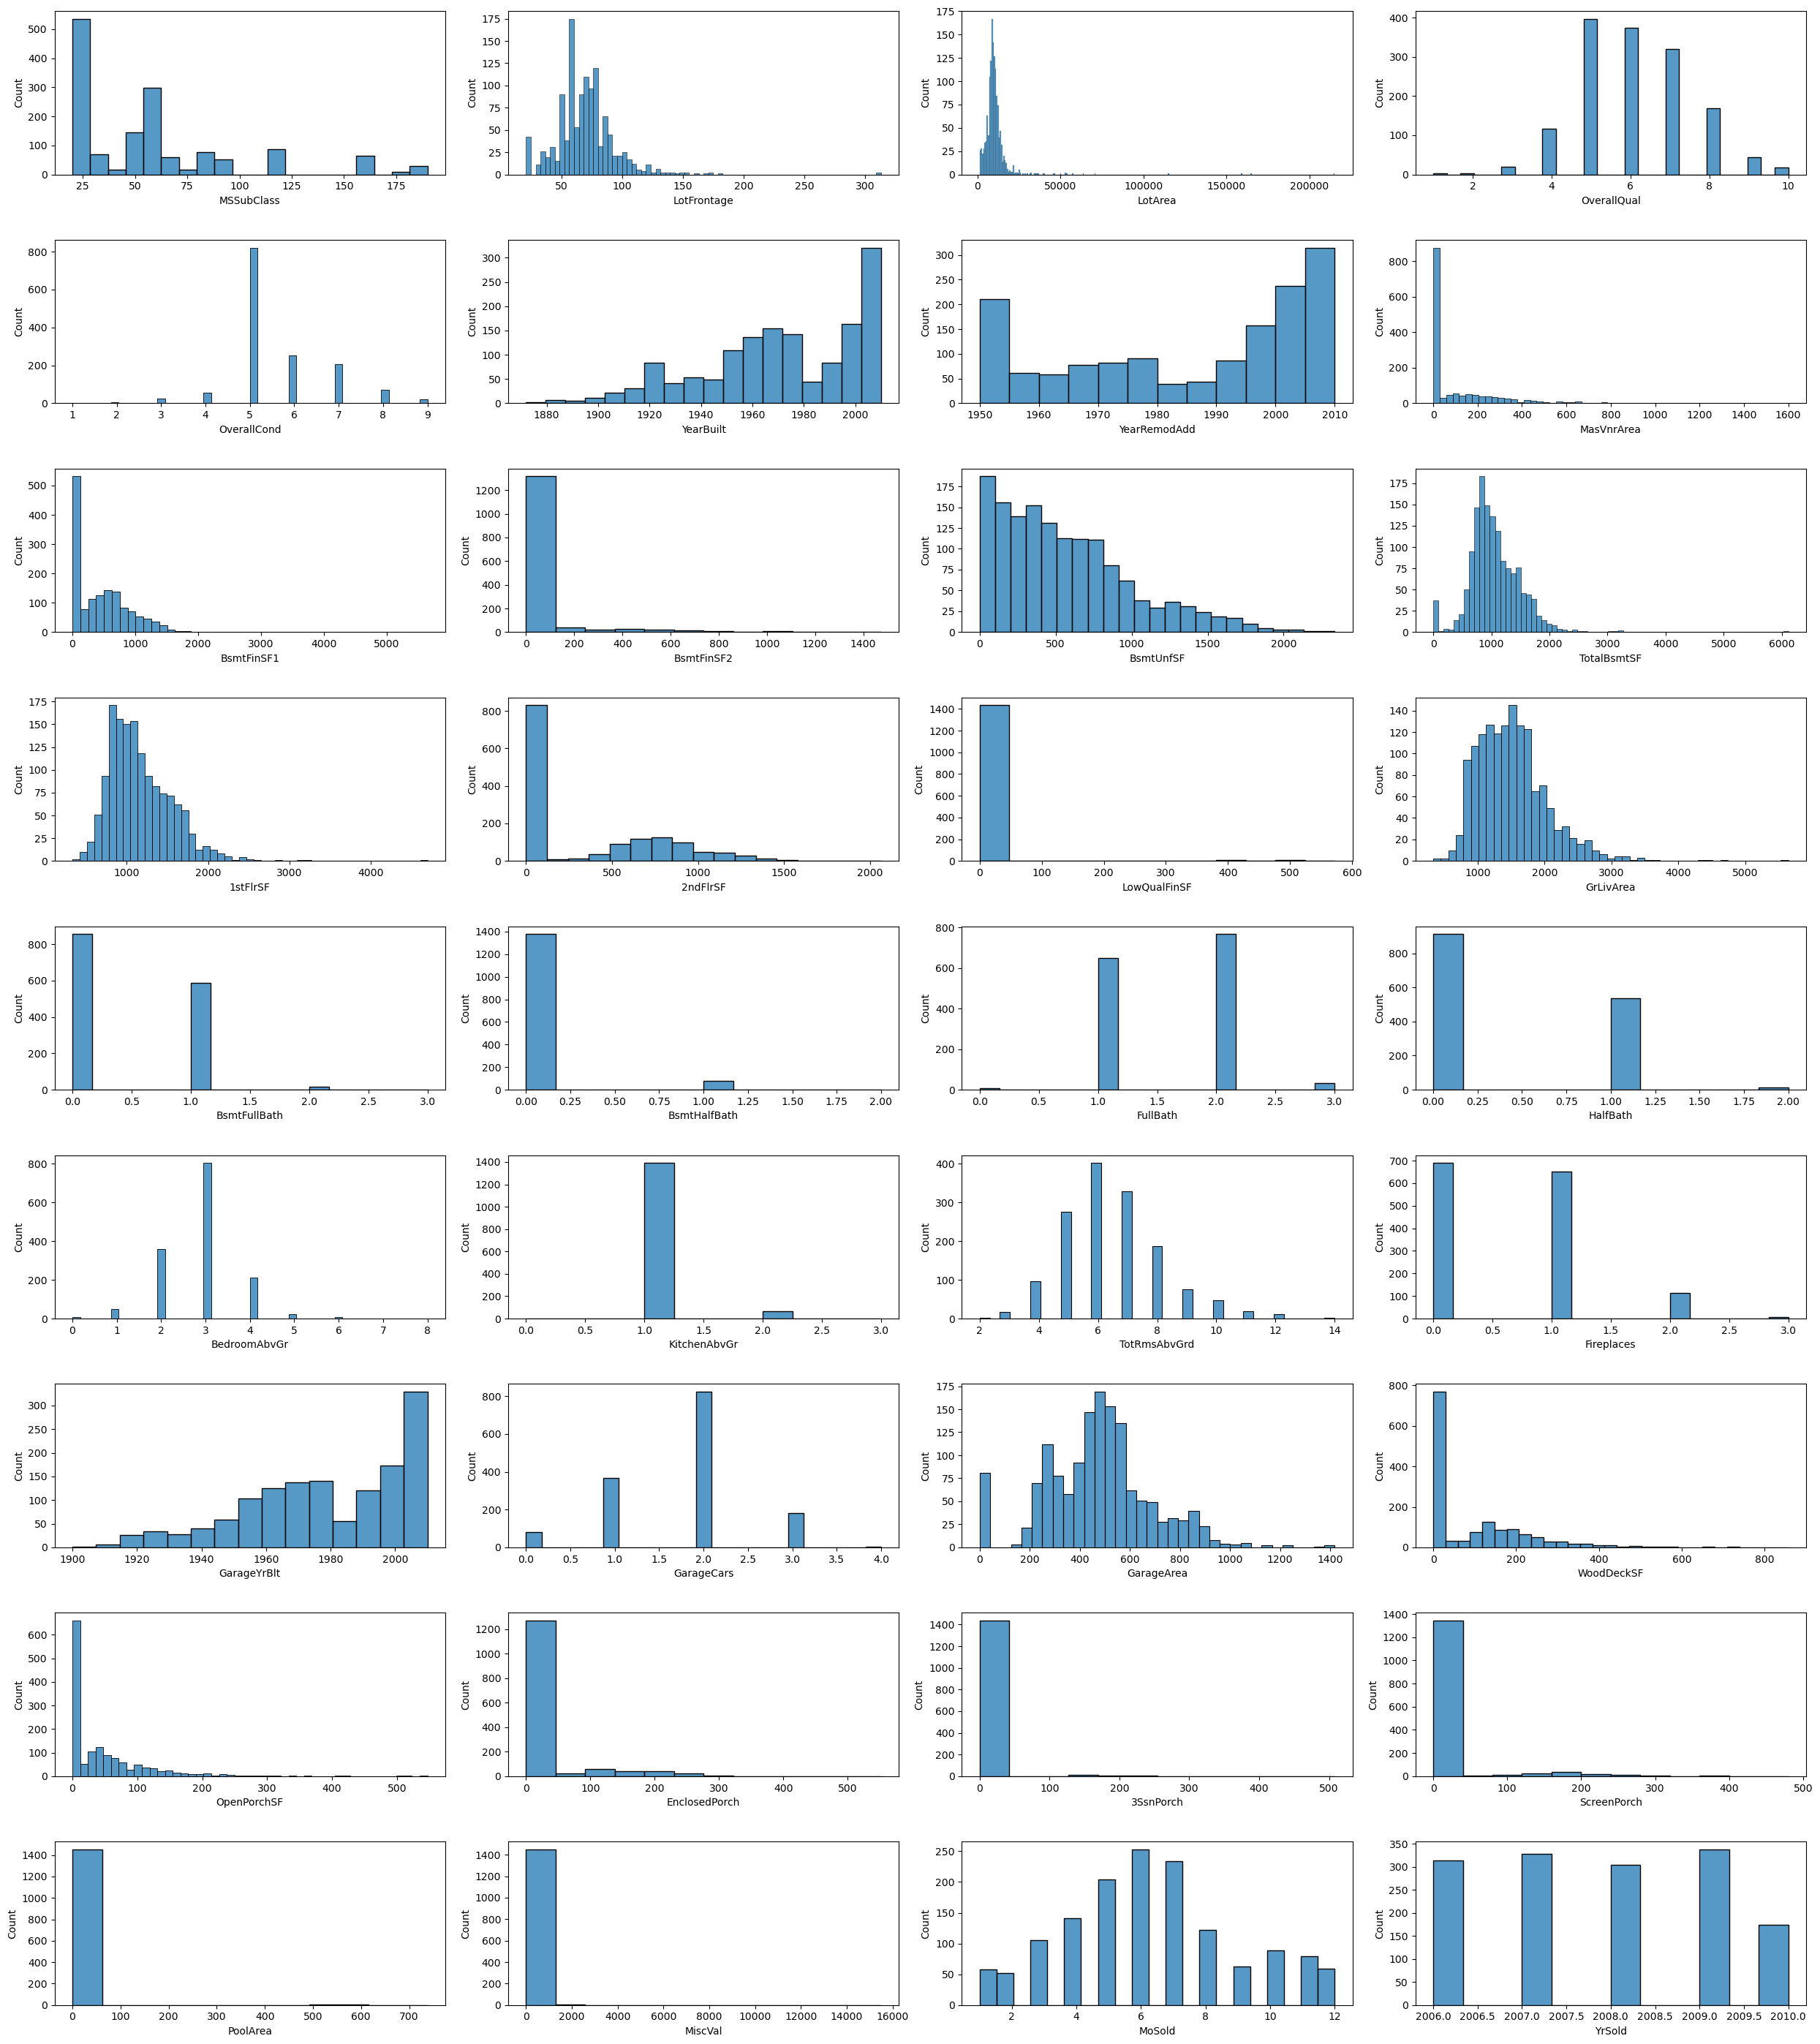

In [13]:
fig,axs = plt.subplots(9,4,figsize=(25,28))
axs = axs.flatten()

for i,feat in enumerate(num_cols):
    sns.histplot(data=df_train,x=feat,ax=axs[i])
    
fig.tight_layout() 
fig.subplots_adjust(hspace=0.4)
plt.show()

As we can see, several features have skewed distributions, which we will transform using boxcox transformations in order to improve the performance of our models.

### Identifying outliers

The presence of outliers in our data can negatively impact the performance of our model, so let's identify and remove some of them by visual inspection through scatterplots.

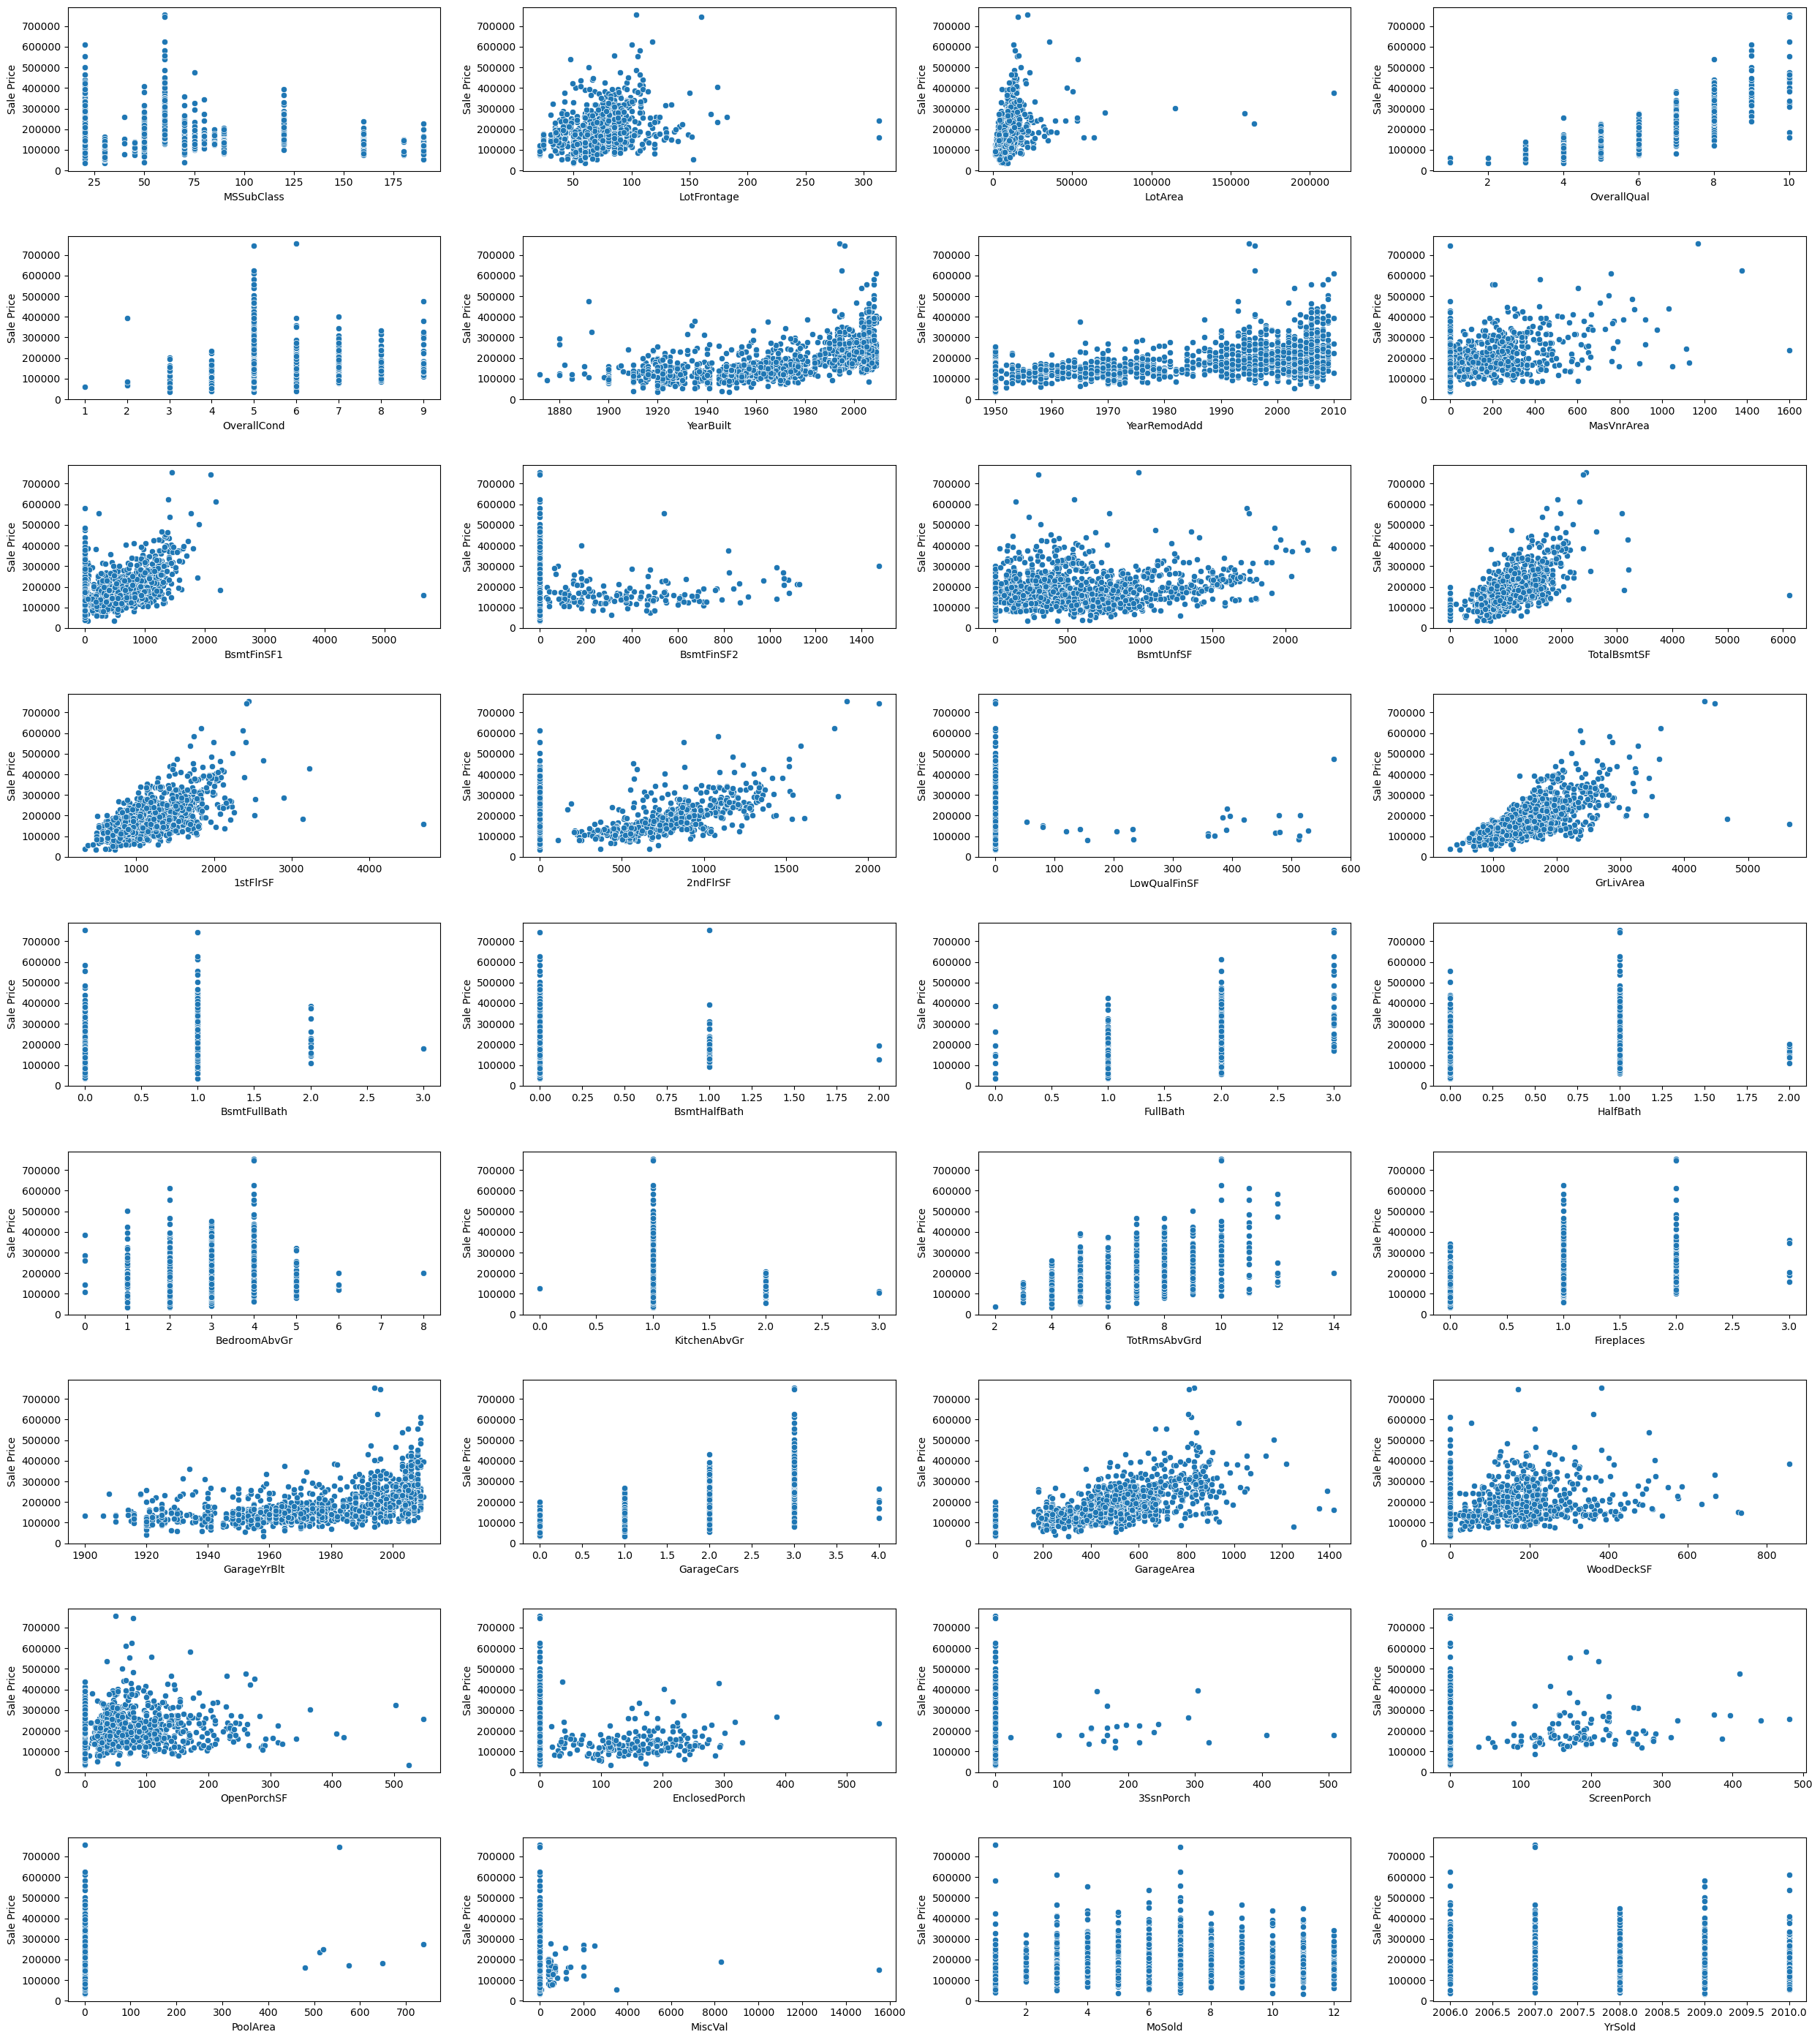

In [14]:
fig,axs = plt.subplots(9,4,figsize=(25,28))
axs = axs.flatten()

for i,feat in enumerate(num_cols):
    sns.scatterplot(data=df_train,x=feat,y='SalePrice',ax=axs[i])
    axs[i].set_ylabel('Sale Price')
    axs[i].set_xlabel(feat)
    
fig.tight_layout() 
fig.subplots_adjust(hspace=0.4)
plt.show()

In [15]:
df_train.query('LotFrontage>300')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [16]:
df_train.query('LotArea>150000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950


In [17]:
df_train.query('MasVnrArea>1500')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


In [18]:
df_train.query('BsmtFinSF2>1400')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


In [19]:
df_train.query('GrLivArea>4000 & SalePrice<300000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [20]:
outliers = [1299,524]

In [21]:
df_train = df_train.drop(outliers)

## Distribution of some features

Let's see the distribution of some categorical features in our dataset.

### Building Type

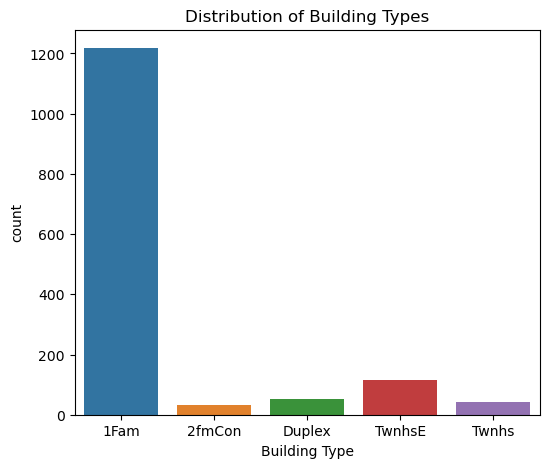

In [22]:
fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(data=df_train,x='BldgType',ax=ax)
ax.set_title('Distribution of Building Types')
ax.set_xlabel('Building Type')

plt.show()

In [23]:
dwellings_type = df_train.groupby('BldgType')['SalePrice'].mean().reset_index()

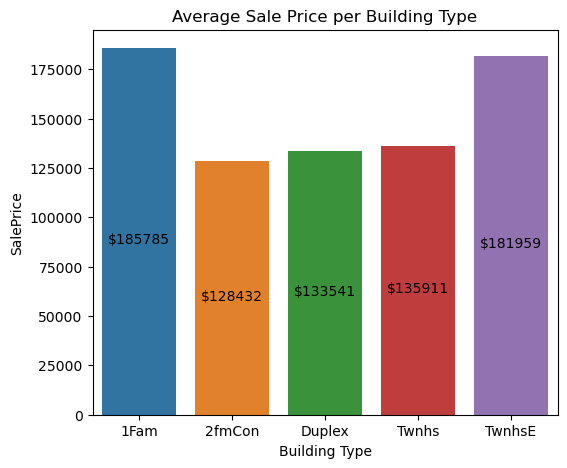

In [24]:
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(data=dwellings_type,x='BldgType',y='SalePrice',ax=ax)
ax.set_title('Average Sale Price per Building Type')
ax.set_xlabel('Building Type')
ax.bar_label(ax.containers[-1], fmt='\n$%.i', label_type='center')

plt.show()

The single-family Detached (1Fam) building type is by far the most common and expensive type of building.

### Zone

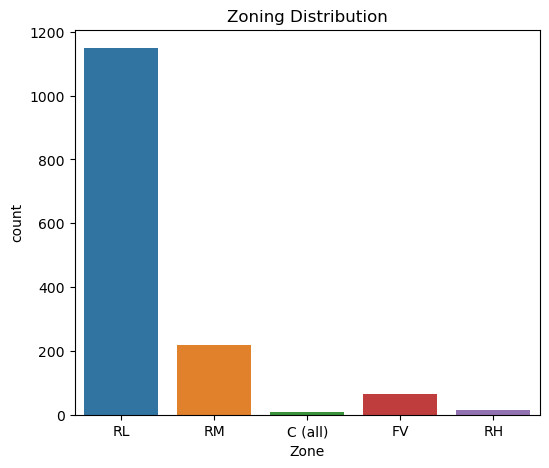

In [25]:
fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(data=df_train,x='MSZoning',ax=ax)
ax.set_title('Zoning Distribution')
ax.set_xlabel('Zone')

plt.show()

In [26]:
zoning_type = df_train.groupby('MSZoning')['SalePrice'].mean().reset_index()

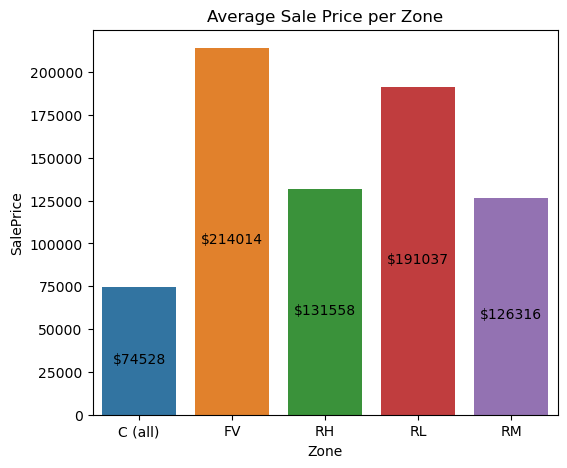

In [27]:
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(data=zoning_type,x='MSZoning',y='SalePrice',ax=ax)
ax.set_title('Average Sale Price per Zone')
ax.set_xlabel('Zone')
ax.bar_label(ax.containers[-1], fmt='\n$%.i', label_type='center')

plt.show()

As we can see houses in the Floating Village Residential (FV) and Residential Low Density (RL) areas are considerably more expensives than those located elsewhere.

### Street Type

In [28]:
street_type = df_train.groupby('Street')['SalePrice'].mean().reset_index()

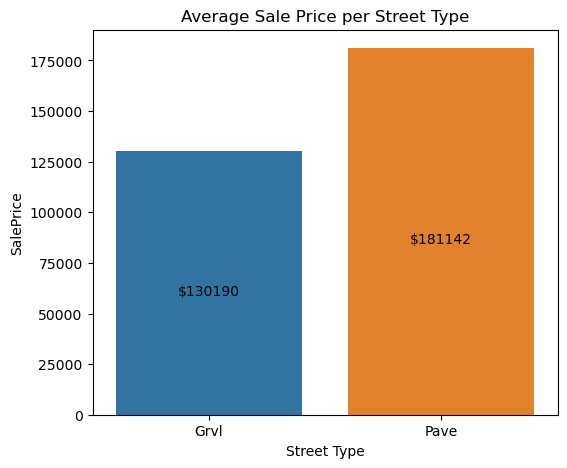

In [29]:
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(data=street_type,x='Street',y='SalePrice',ax=ax)
ax.set_title('Average Sale Price per Street Type')
ax.set_xlabel('Street Type')
ax.bar_label(ax.containers[-1], fmt='\n$%.i', label_type='center')

plt.show()

Houses located on paved street are more expensive than those on gravel roads.

### Building Shape

In [30]:
prop_type = df_train.groupby('LotShape')['SalePrice'].mean().reset_index()

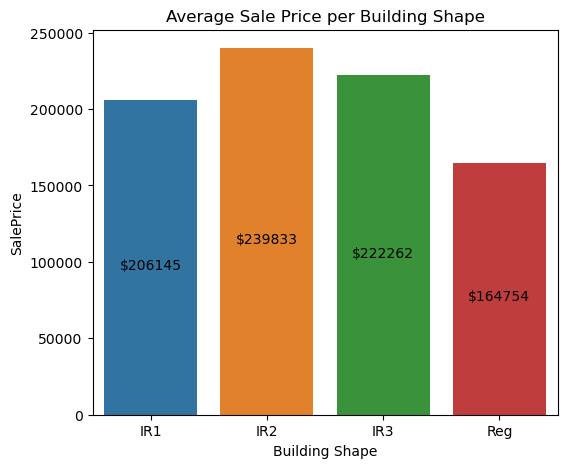

In [31]:
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(data=prop_type,x='LotShape',y='SalePrice',ax=ax)
ax.set_title('Average Sale Price per Building Shape')
ax.set_xlabel('Building Shape')
ax.bar_label(ax.containers[-1], fmt='\n$%.i', label_type='center')

plt.show()

It seems that building shape has less influence on the house price, with those with irregular shapes being pricier than regular-shaped houses.  

### House Price over time

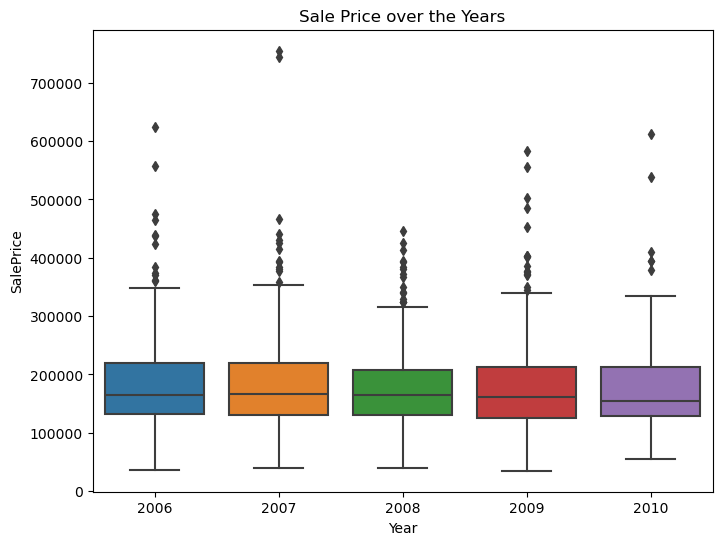

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df_train,x='YrSold',y='SalePrice',ax=ax)
ax.set_title('Sale Price over the Years')
ax.set_xlabel('Year')

plt.show()

Despite some outliers, the average house price has remained fairly constant over the years.

# Feature Engineering

## Missing data

We previously saw the existence of lots of missing values in our data. Let's calculate the percentage of missing value for each feature.

In [33]:
missing_train = (df_train.isnull().sum()/len(df_train))*100
missing_test = (df_test.isnull().sum()/len(df_test))*100

In [34]:
missing_train = missing_train.drop(missing_train[missing_train == 0].index).sort_values(ascending=False)
missing_test = missing_test.drop(missing_test[missing_test == 0].index).sort_values(ascending=False)

In [35]:
df_missing_train = pd.DataFrame({'Percent_Missing' :missing_train})
df_missing_test = pd.DataFrame({'Percent_Missing' :missing_test})

In [36]:
df_missing_test

,Percent_Missing
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
MasVnrType,61.274846
FireplaceQu,50.034270
LotFrontage,15.558602
GarageCond,5.346127
GarageYrBlt,5.346127
GarageQual,5.346127


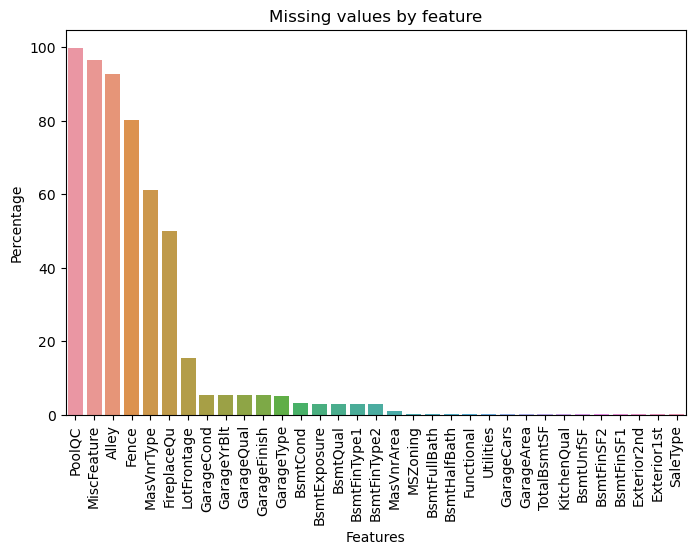

In [37]:
f, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df_missing_test,x=df_missing_test.index, y='Percent_Missing',ax=ax)
ax.set_xlabel('Features')
ax.set_ylabel('Percentage')
ax.set_title('Missing values by feature')
plt.xticks(rotation='vertical')
plt.show()

We are going to create a function to impute all these missing values, taking into account the type of feature and its statistical properties.

In [38]:
def impute_missing_values(df): 
    df = df.copy()
    #Fill with None
    df['PoolQC'] = df['PoolQC'].fillna('None')
    df['MiscFeature'] = df['MiscFeature'].fillna('None')
    df['Alley'] = df['Alley'].fillna('None')
    df['Fence'] = df['Fence'].fillna('None')
    df['FireplaceQu'] = df['FireplaceQu'].fillna('None')    
    df['GarageType'] = df['GarageType'].fillna('None')
    df['GarageFinish'] = df['GarageFinish'].fillna('None')
    df['GarageQual'] = df['GarageQual'].fillna('None')
    df['GarageCond'] = df['GarageCond'].fillna('None')    
    df['BsmtQual'] = df['BsmtQual'].fillna('None')
    df['BsmtCond'] = df['BsmtCond'].fillna('None')
    df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')    
    df["MasVnrType"] = df["MasVnrType"].fillna("None")   
    df['MSSubClass'] = df['MSSubClass'].fillna("None")   
    #Fill missing values by the median LotFrontage of the neighborhood
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())) 
    #Fill with zeros
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
    df['GarageArea'] = df['GarageArea'].fillna(0)
    df['GarageCars'] = df['GarageCars'].fillna(0)   
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)   
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)   
    # Fill with mode
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    df["Functional"] = df["Functional"].fillna("Typ")
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])  
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])   
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])      
    #Drop useless feature
    df = df.drop(['Utilities'], axis=1)
    
    return df

In [39]:
df_train = impute_missing_values(df_train)
df_test = impute_missing_values(df_test)

Let's verify now: 

In [40]:
print(f'Number of missing values in the training data:',sum(df_train.isnull().sum()))
print(f'Number of missing values in the test data:',sum(df_test.isnull().sum()))

Number of missing values in the training data: 0
Number of missing values in the test data: 0


Now we are going to create some features that might be useful for predicting the price of the house.

In [41]:
def create_feat(df):
    df = df.copy() 
    #House Age
    df['House_Age'] = df['YrSold'] - df['YearBuilt']
    #House remodeling 
    df['Remode_Age'] = df['YrSold'] - df['YearRemodAdd']
    #House total square feet
    df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
    #Total Baths
    df['Total_Baths'] = df['BsmtFullBath'] + df['FullBath'] + 0.5*(df['BsmtHalfBath']+df['HalfBath']) 
    #Total PorchSF
    df['Total_PorchSF'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
    #Has second floor
    df['Has2ndFloor'] = (df['2ndFlrSF']>0).astype('object')
    #Transforming numeric columns into objects
    df['MSSubClass'] = df['MSSubClass'].astype('object')
    df['OverallCond'] = df['OverallCond'].astype('object')
    df['YrSold'] = df ['YrSold'].astype('object')
    df['MoSold'] = df ['MoSold'].astype('object')    
    #Transformed columns
    tr_columns = ['YearRemodAdd','YearBuilt','1stFlrSF','2ndFlrSF','TotalBsmtSF',
                 'BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','OpenPorchSF',
                  '3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
    #Drop transformed columns
    df = df.drop(columns=tr_columns,axis=1)
    
    return df

In [42]:
df_train = create_feat(df_train)
df_test = create_feat(df_test)

## Identifying correlated variables

Highly correlated variables can negatively impact model performance in many ways, for example: overfitting, multicollinearity, increased variance in parameter estimates and reduced interpretability.

In [43]:
num_cols = df_train.drop('SalePrice',axis=1).select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()

Let's compute the correlation matrix of the numerical features

In [44]:
corr = df_train.corr(numeric_only=True)
trimask = np.triu(np.ones_like(corr, dtype=bool))

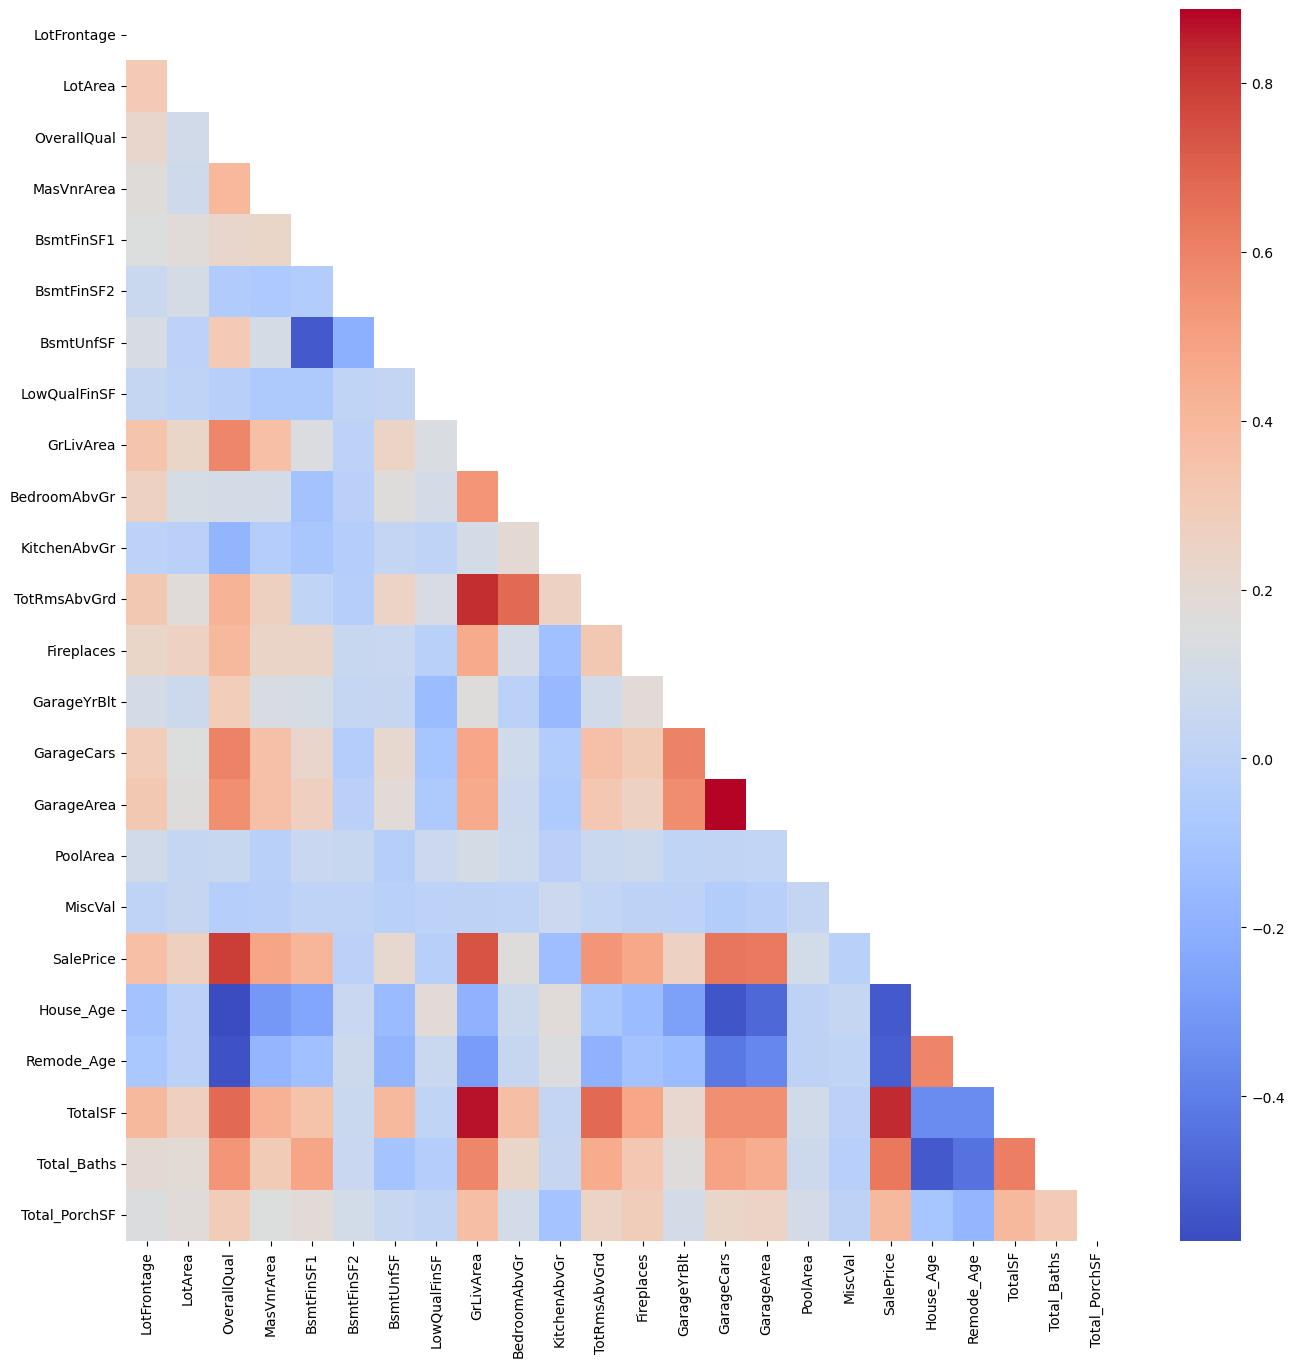

In [45]:
fig, ax = plt.subplots(figsize = (16,16))
sns.heatmap(corr, annot=True, mask = trimask,fmt = '.1f',cmap='coolwarm',ax=ax)
plt.show()

In [46]:
corr_cols = ['TotRmsAbvGrd','GarageArea']

In [47]:
df_train = df_train.drop(columns=corr_cols,axis=1)
df_test = df_test.drop(columns=corr_cols,axis=1)

## Transform highly skewed data

As we mentioned earlier there are several numerical feature with skewed distributions. Let's take a closer look

In [48]:
num_cols = df_train.drop('SalePrice',axis=1).select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()

In [49]:
len(num_cols)

21

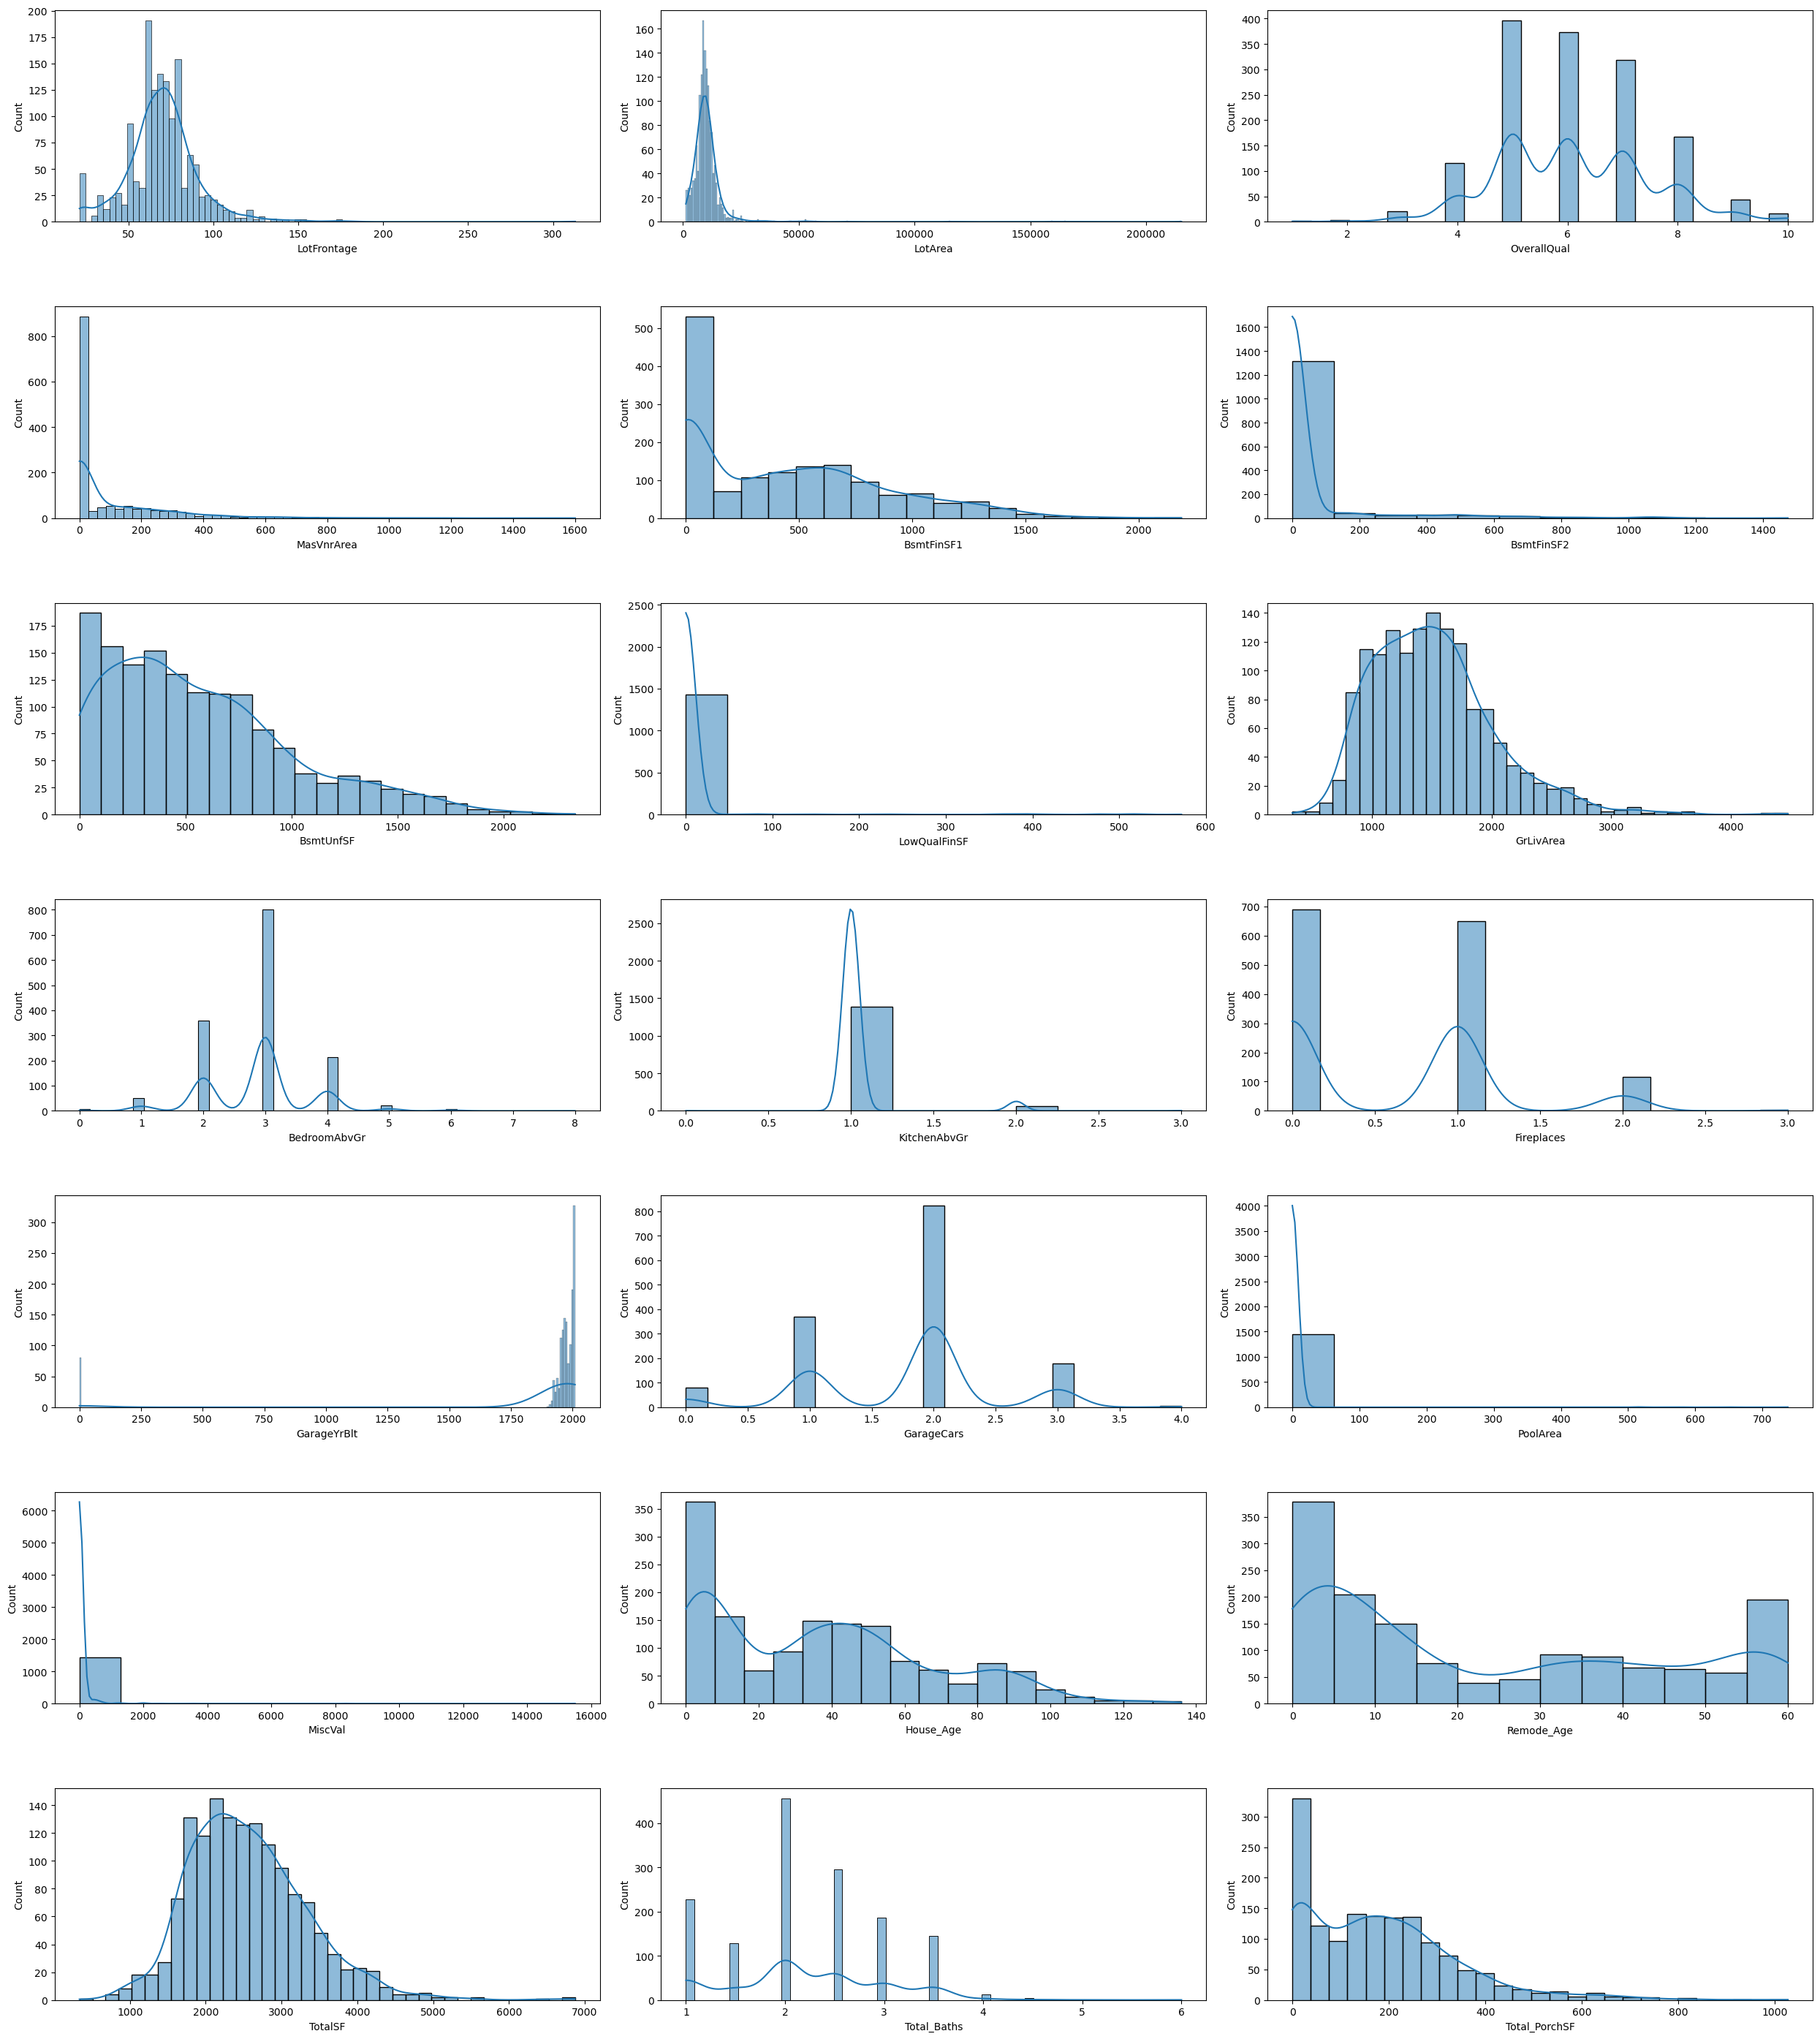

In [50]:
fig,axs = plt.subplots(7,3,figsize=(25,28))
axs = axs.flatten()

for i,feat in enumerate(num_cols):
    sns.histplot(data=df_train,x=feat,kde=True,ax=axs[i])

fig.tight_layout() 
fig.subplots_adjust(hspace=0.4)
#axs[-1].set_axis_off()
plt.show()

Now in order to transform the skewed features we create a function that applies a box-cox transformation if the skewness is higher than a specified threshold.

In [51]:
def transf_high_skew_feat(df,threshold):
    df = df.copy()
    
    cols = df_train.drop('SalePrice',axis=1).select_dtypes(include=['float64','int64']).columns.tolist()    
    high_skewed_cols = [col for col in cols if (df[col].skew() > threshold)]
    
    for skcol in high_skewed_cols:
        df[skcol] = boxcox1p(df[skcol],0.15)
    
    return df

In [52]:
df_train = transf_high_skew_feat(df_train,0.75)
df_test = transf_high_skew_feat(df_test,0.75)

## Pipeline 

## Preparing for training

In order to make our target variable Sale Price more gaussian-like we apply a log transformation.

In [53]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

In [54]:
X = df_train.drop('SalePrice',axis=1)
X_test = df_test
y = df_train['SalePrice']

### Ordinal and One-Hot encoding

In [56]:
len(cat_cols)

47

In [57]:
ord_cols = ['OverallCond','PoolQC','LotShape','LandContour','LandSlope', 'ExterQual','ExterCond',
            'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual',
            'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [58]:
oh_cols = ['MSSubClass','MSZoning','Street','Alley','LotConfig','Neighborhood','Condition1','Condition2',
 'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating',
         'Electrical','GarageType','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition','Has2ndFloor']

In [59]:
len(ord_cols+oh_cols)

47

In [60]:
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1).set_output(transform="pandas")

In [61]:
oh_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform="pandas")

### Standard scaling

In [62]:
scaler = StandardScaler().set_output(transform="pandas")

### Assembling the pipeline

In [63]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',scaler,num_cols),
    ('ord_pipeline',ord_encoder,ord_cols),
    ('oh_pipeline',oh_encoder,oh_cols)],
    remainder='passthrough',
    n_jobs=-1)

In [64]:
prep_pipeline = Pipeline(steps=[
    ('col_transf',col_trans)
]).set_output(transform='pandas')

In [65]:
X_prep = prep_pipeline.fit_transform(X)
X_test = prep_pipeline.transform(X_test)

## PCA for Linear Regression

In the case of linear regression with many features, dimensionality reduction techniques like PCA can help select those that better explain the variance in the estimation of our target variable.

In [69]:
pca = PCA().set_output(transform="pandas")

In [70]:
pca.fit_transform(X_prep)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca233,pca234,pca235,pca236,pca237,pca238,pca239,pca240,pca241,pca242
Id,,,,,,,,,,,,,,,,,,,,,
1,2.724173,0.568121,-1.291868,-0.519910,1.056290,1.859850,-0.183044,-0.721747,-0.829621,0.336714,...,1.838359e-15,1.426491e-15,-1.284694e-15,2.786440e-17,-6.406530e-16,-4.309745e-16,-4.088322e-16,-4.038228e-16,1.423221e-16,-1.128649e-15
2,0.983207,3.184826,-0.813853,0.636272,1.218344,-0.206861,-1.836729,-0.539580,-0.076320,-1.731285,...,3.965691e-16,-9.431306e-16,-2.459712e-16,-2.142745e-16,3.707997e-16,7.961644e-17,6.815921e-16,3.062598e-17,-1.689825e-16,-7.640738e-16
3,3.634557,0.749392,0.188639,-0.178809,0.548432,-0.400585,0.329638,-2.556024,-0.500636,0.047154,...,-6.773463e-16,-4.206322e-17,9.337602e-16,-4.889190e-16,4.861326e-16,-4.000072e-16,-6.011043e-16,-1.004612e-16,-3.144577e-16,7.654153e-17
4,-0.175228,2.280726,1.238472,0.159823,1.481466,-0.811156,-1.158371,-0.318494,0.981149,3.280719,...,3.325756e-16,3.077439e-16,4.448010e-16,5.683630e-16,2.941781e-17,8.253125e-17,5.672652e-16,-3.860356e-16,-3.867274e-17,-4.224459e-16
5,5.112637,0.765510,1.569552,-0.225171,0.726673,-0.466609,0.245047,-1.634249,0.001534,-0.323787,...,-2.104071e-16,3.348630e-16,-5.987774e-16,6.216116e-16,8.552352e-17,-3.109098e-17,1.286534e-16,3.701523e-16,1.834675e-16,-7.035449e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.958894,-3.624536,-0.332378,-0.408966,-0.197231,1.237795,-0.319583,-2.261710,-0.882474,-1.008882,...,4.551723e-17,-2.334264e-17,5.725425e-17,-8.801751e-17,1.045730e-16,3.557139e-17,3.441819e-17,-7.528694e-18,1.304708e-16,6.967571e-17
1457,0.507099,4.085265,3.292669,-0.647492,-0.144745,1.994805,0.122408,0.073350,-0.211989,-1.557450,...,-5.654221e-17,-8.372258e-18,8.235286e-18,2.003957e-16,1.795874e-16,-3.692155e-17,-6.562832e-17,-9.857871e-17,5.301232e-17,1.936758e-16
1458,0.588250,0.320266,1.086778,3.006443,3.345716,0.447926,-3.352224,-0.195376,0.708342,-0.508642,...,-1.538757e-17,-1.509268e-16,-6.549868e-17,-1.550565e-16,-2.176967e-17,1.271325e-16,-1.316561e-17,-2.464511e-17,5.769354e-17,5.168522e-17


Now , we compute cumulative explained variance

In [71]:
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)

Let us now choose the number of components based on an explained variance threshold of 0.95.

In [72]:
n_components = np.argmax(cum_exp_var >= 0.95) + 1

In [73]:
pca = PCA(n_components=n_components)

In [74]:
n_components

63

# Model Building

Let's build several models to play around.

In [125]:
linear_reg = LinearRegression()

In [126]:
linear_reg_pca = make_pipeline(pca,LinearRegression())

In [85]:
lasso_reg = make_pipeline(RobustScaler(), Lasso(random_state = 42))

In [86]:
ridge_reg = Ridge()

In [87]:
enet_reg = make_pipeline(RobustScaler(), ElasticNet(random_state = 42))

In [88]:
rf_reg = RandomForestRegressor(random_state = 42)

In [89]:
xgb_reg = XGBRegressor(random_state = 42,verbosity=0)

In [90]:
lgbm_reg = LGBMRegressor(random_state = 42,verbosity=0)

In [91]:
cb_reg = CatBoostRegressor(random_state = 42,silent=True)

Let's put all these in a list to evaluate them using 5-fold cross-validation

In [127]:
model_list = [linear_reg, linear_reg_pca, lasso_reg, ridge_reg, enet_reg, rf_reg, xgb_reg, lgbm_reg,cb_reg]

## Evaluation using cross-validation

We are going to create a function that allow us to asses model performance using 5-fold cross-validation.

In [128]:
def get_rmse_score(model_list,X,y):
    rmse_scores = []
    for model in model_list:
        model.fit(X,y)
        score = cross_val_score(estimator=model,X=X,y=y,cv=5,scoring='neg_mean_squared_error',n_jobs=-1).mean()
        rmse_scores.append(np.sqrt(-1*score))
        
    df = {'Model': model_list,'RMSE_Score':rmse_scores}
    rmse_df = pd.DataFrame(df)
    
    return rmse_df

In [129]:
get_rmse_score(model_list,X_prep,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


,Model,RMSE_Score
0,LinearRegression(),1.784374e+10
1,"(PCA(n_components=63), LinearRegression())",1.197583e-01
2,"(RobustScaler(), Lasso(random_state=42))",3.867188e-01
3,Ridge(),1.172413e-01
4,"(RobustScaler(), ElasticNet(random_state=42))",3.779850e-01
5,"(DecisionTreeRegressor(max_features=1.0, rando...",1.357064e-01
6,"XGBRegressor(base_score=None, booster=None, ca...",1.304802e-01
7,"LGBMRegressor(random_state=42, verbosity=0)",1.244732e-01
8,<catboost.core.CatBoostRegressor object at 0x0...,1.131967e-01


As we can see, using PCA dramatically improve the performance of linear regression. Now in order to create a robust ensemble regressor we are going to adjust the hyperparameters of the boosting regressors (xgboost,lightgbm and catboost). This can be accomplish using Optuna which uses a Bayesian strategy to search for optimal hyperparameter. 

## Hyperparameter optimization

For each model we define an objective function to be minimized. This function includes the model parameters and an evaluation metric, in this case RMSE.

### CatBoost

In [103]:
def cb_optimization(trial,X,y):     
    param = {
    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
    'iterations': trial.suggest_int('iterations', 300, 3000),
    'depth': trial.suggest_int('depth', 1, 12),
    "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1,log=True),    
    'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 30),
    'bagging_temperature':  trial.suggest_float("bagging_temperature", 0, 10),
    'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),
    "random_state":42,
    'verbose':False,
    #'cat_features':cat_features,
    }
    model = CatBoostRegressor(**param)
    score = cross_val_score(estimator=model,X=X,y=y,cv=5,scoring='neg_mean_squared_error',n_jobs=-1).mean()
    rmse = np.sqrt(-1*score)   
    return rmse

In [104]:
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.HyperbandPruner()
study = optuna.create_study(study_name='cb',direction='minimize',sampler=sampler,pruner=pruner)
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(lambda trial: cb_optimization(trial,X_prep,y), n_trials=30,show_progress_bar=True)  

[I 2024-04-09 15:59:11,937] A new study created in memory with name: cb


  0%|          | 0/30 [00:00<?, ?it/s]

In [105]:
fixed_param = {
      'random_state':42,
    'verbose':False
}

We now save these parameters and pass them to the model.

In [106]:
cb_param = {**fixed_param,**study.best_params}

In [107]:
tuned_cb_reg = CatBoostRegressor(**cb_param)

### XGBoost

In [108]:
def xgb_optimization(trial,X,y):
    param = {
    'booster': 'gbtree',
    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
    'n_estimators': trial.suggest_int('n_estimators', 300, 3000),
    'max_depth': trial.suggest_int('max_depth', 5, 30),
    'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 0.9),
    'min_child_weight': trial.suggest_int('min_child_weight', 1, 30),
    'gamma' : trial.suggest_float('gamma', 1e-8, 1.0),
    'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
    'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
    "random_state":42
    }
    model = XGBRegressor(**param)
    score = cross_val_score(estimator=model,X=X,y=y,cv=5,scoring='neg_mean_squared_error',n_jobs=-1).mean()
    rmse = np.sqrt(-1*score)   
    
    return rmse

In [109]:
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.HyperbandPruner()
study = optuna.create_study(study_name='xgb',direction='minimize',sampler=sampler,pruner=pruner)
study.optimize(lambda trial: xgb_optimization(trial,X_prep,y), n_trials=30,show_progress_bar=True)  

  0%|          | 0/30 [00:00<?, ?it/s]

In [110]:
fixed_params = {
    'booster': 'gbtree',
    "random_state":42
}

In [111]:
xgb_param = {**fixed_params,**study.best_params}

In [112]:
tuned_xgb_reg = XGBRegressor(**xgb_param)

### LightGBM

In [113]:
def lgbm_optimization(trial,X,y):  
    param = {
            "random_state":42,
            "verbosity": -1,
            "boosting_type": "gbdt",
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
            'n_estimators': trial.suggest_int('n_estimators', 300, 600),
            'lambda_l1': trial.suggest_float('lambda_l1', 0.01, 0.1, log=True),
            'lambda_l2': trial.suggest_float('lambda_l2', 0.001, 0.04, log=True),
            'max_depth': trial.suggest_int('max_depth', 10, 30),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.9),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'min_child_samples': trial.suggest_int('min_child_samples', 20,70),
    }
    model = LGBMRegressor(**param)
    score = cross_val_score(estimator=model,X=X,y=y,cv=5,scoring='neg_mean_squared_error',n_jobs=-1).mean()
    rmse = np.sqrt(-1*score)   
    
    return rmse

In [114]:
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.HyperbandPruner()
study = optuna.create_study(study_name='lgbm',direction='minimize',sampler=sampler,pruner=pruner)
study.optimize(lambda trial: lgbm_optimization(trial,X_prep,y), n_trials=30,show_progress_bar=True)  

  0%|          | 0/30 [00:00<?, ?it/s]

In [115]:
fixed_param = {
    "random_state":42,
    "verbosity": -1,
    "boosting_type": "gbdt",
}

In [116]:
lgbm_param = {**fixed_param,**study.best_params}

In [117]:
tuned_lgbm_reg = LGBMRegressor(**lgbm_param)

### Voting Regressor

Now that we finished, tuning our models it's time to create a robust voting regressor.

In [118]:
estimators = [('cb',tuned_cb_reg),('xgb',tuned_xgb_reg),('lgbm',tuned_lgbm_reg)]

In [119]:
vot_reg = VotingRegressor(estimators=estimators)

In [120]:
vot_reg.fit(X_prep,y)

VotingRegressor(estimators=[('cb',
                             <catboost.core.CatBoostRegressor object at 0x0000016371255750>),
                            ('xgb',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.27761460194769766,
                                          device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma...
                                          multi_strategy=None,
                                          n_estimators=2097, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('lgbm',
                             LGBMRegressor(colsample_bytree=0.30753040015340277,
                                           lambda_l1=0.06280509387356749,
                                           lambda_l2=0.001801266904322204,
                                           learning_rate=0.030220593082138817,
                                           max_depth=19, min_child_samples=32,
                                           n_estimators=499, random_state=42,
                                           subsample=0.701668995376719,
                                           verbosity=-1))])

## Submission

To submit our predictions on the test set we need to undo our log transform after predicting with our regressor. 

In [121]:
y_test = np.expm1(vot_reg.predict(X_test))

In [122]:
submission = pd.DataFrame({
    'Id': df_test.index,
    'SalePrice': y_test
})

In [123]:
submission

,Id,SalePrice
0,1461,120149.744503
1,1462,162039.604733
2,1463,184856.488959
3,1464,199748.138397
4,1465,182614.478154
...,...,...
1454,2915,88508.071716
1455,2916,89857.013289
1456,2917,158816.718375
1457,2918,121227.218367


In [124]:
submission.to_csv('09_04_2024.csv', index=False)